<a href="https://colab.research.google.com/github/A-sy-coding/ML-Class/blob/master/Deep_learning-Class/homework_3_1%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 기본 GAN을 이용한  mnist 데이터 숫자 이미지 생성

* 평가 지표도 있으면 좋을 것 같음

* 하이퍼 파라미터를 다양하게 조정하여 학습 실행

batch_size 변경, drop_out 비율, 가중치 초기화

In [3]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.7.0


In [4]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 10 kB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 503 kB 43.4 MB/s 
     |████████████████████████████████| 3.8 MB 44.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=83289653fbc845d321bab84a54b6a812b3535ac85c8a653934b950ccaa632c1c
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [1]:
# 필요한 라이브러리 생성

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 깨짐 방지 --> 폰트를 아까전 다운 받은 폰트로 변경
# mpl.rc('font', family='NanumBarunGothic') 
# mpl.rc('axes',unicode_minus = False)

In [2]:
print(tf.__version__)

1.15.0


In [3]:
# tensorflow 1.15에서만 돌아간다.
from tensorflow.examples.tutorials.mnist import input_data

#데이터 불러오기
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
# hyper parameter 설정
n_noise = 100 # 잡음 신호의 차원
n_h1 = 150  # 첫번째 은닉층 노드 개수
n_h2 = 300 # 두번째 은닉층 노드 개수
batch_size = 256  # 미니배치의 크기  -->  미니배치 변경
n_epoch = 30000 # 에포크 횟수  --> 에포크 횟수 변경

In [5]:
# 생성자 구현 --> 잡음신호를 입력으로 받아 진짜 데이터와 가짜 데이터 생성

# Variable()는 세션이 실행될 때 마다 그래프에서 고정된 상태를 유지할 수 있다. 
#그렇기 때문에 변수는 최적화를 위한 반복 과정에서 현재의 변수가 다음 반복 과정에 영향을 줄 수 있다.
def generator(z_noise):

  # truncated_normal을 이용하여 너무작거나 큰 값을 제외하여 랜덤하게 값을 출력한다.

  w1 = tf.Variable(tf.truncated_normal([n_noise, n_h1], stddev = 0.1), 
                   name = 'w1_g', dtype = tf.float32)
  b1 = tf.Variable(tf.zeros([n_h1]), name = 'b1_g', dtype = tf.float32)
  h1 = tf.nn.relu(tf.matmul(z_noise, w1) + b1)

  w2 = tf.Variable(tf.truncated_normal([n_h1, n_h2], stddev = 0.1), 
                   name = 'w2_g', dtype = tf.float32)
  b2 = tf.Variable(tf.zeros([n_h2]), name = 'b2_g', dtype = tf.float32)
  h2 = tf.nn.relu(tf.matmul(h1, w2)+ b2)
  
  w3 = tf.Variable(tf.truncated_normal([n_h2, 28*28], stddev = 0.1), 
                   name = 'w3_g', dtype = tf.float32)
  b3 = tf.Variable(tf.zeros([28*28]), name = 'b3_g', dtype = tf.float32)
  h3 = tf.matmul(h2, w3) + b3

  out_gen = tf.nn.tanh(h3)
  weight_g = [w1, b1, w2, b2, w3, b3]

  return out_gen , weight_g

In [6]:
# 판별자 구현 --> 진짜 이미지와 가짜 이미지를 구별하는 역할 수행

def discriminator(x , out_gen, keep_prob):
  
  x_all = tf.concat([x,out_gen],0)  # 진짜 데이터와 가짜 데이터 합치기
  w1 = tf.Variable(tf.truncated_normal([28*28, n_h2], stddev=0.1),
                   name = 'w1_d', dtype = tf.float32)
  b1 = tf.Variable(tf.zeros([n_h2]), name = 'b1_d', dtype=tf.float32)
  h1 = tf.nn.dropout(tf.nn.relu(tf.matmul(x_all, w1) + b1), keep_prob)

  w2 = tf.Variable(tf.truncated_normal([n_h2, n_h1], stddev=0.1),
                   name = 'w2_d', dtype = tf.float32)
  b2 = tf.Variable(tf.zeros([n_h1]), name = 'b2_d', dtype=tf.float32)
  h2 = tf.nn.dropout(tf.nn.relu(tf.matmul(h1, w2) + b2), keep_prob)

  w3 = tf.Variable(tf.truncated_normal([n_h1, 1], stddev=0.1),
                   name = 'w3_d', dtype = tf.float32)
  b3 = tf.Variable(tf.zeros([1]), name = 'b3_d', dtype=tf.float32)
  h3 = tf.matmul(h2, w3) + b3

  y_data = tf.nn.sigmoid(tf.slice(h3, [0,0], [batch_size, -1], name = None))
  y_fake = tf.nn.sigmoid(tf.slice(h3, [batch_size, 0] , [-1,-1], name=None))

  weight_d = [w1, b1, w2, b2, w3, b3]

  return y_data, y_fake, weight_d

In [ ]:
# 변수 정의

# placeholder는 다른 텐서를 할당하는 것
x = tf.placeholder(tf.float32, [batch_size, 28*28], name = 'x_data')
z_noise = tf.placeholder(tf.float32, name = 'z_prior')

# dropot의 keep_prob 확률 
keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')

# 생성자 함수를 이용해 생성자 출력 및 가중치 정의
out_gen, weight_g = generator(z_noise)

# 판별자 함수를 이용해 판별자 출력 및 가중치 정의
y_data, y_fake, weight_d = discriminator(x, out_gen, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# 판별자와 생성자를위한 손실함수 및 최적화

disc_loss =  - (tf.log(y_data) + tf.log(1-y_fake)) # 판별자 손실함수
gen_loss = - tf.log(y_fake)   # 생성자 손실함수
optimizer = tf.train.AdamOptimizer(0.0001)  # 최적화 기법으로 adam사용
d_trainer = optimizer.minimize(disc_loss, var_list = weight_d) # 판별자 학습
g_trainer = optimizer.minimize(gen_loss, var_list = weight_g) # 생성자 학습

* gpu 사용 가능 확인

In [ ]:
# gpu 사용하기에 앞서 gpu를 사용가능한지 알아보기
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# 모델 학습

# 세션을 하나 설정하고, 실행시킨다.
sess = tf.Session() # 세션 선언
init = tf.global_variables_initializer() # 초기화 함수 저장
sess.run(init) # 세션에서 초기화 실행

z_sample = np.random.uniform(-1,1,size=(batch_size, n_noise)).astype(np.float32)

with tf.device('/device:GPU:0'):
  for epoch in range(n_epoch):
    batch_x, _ = mnist.train.next_batch(batch_size) # 배치 사이즈 만큼 가져오기
    x_value = 2*batch_x.astype(np.float32) -1
    z_value = np.random.uniform(-1,1,size = (batch_size, n_noise)).astype(np.float32) # 잡음 생성
    sess.run(d_trainer, feed_dict = {x:x_value, z_noise : z_value, keep_prob : 0.7})
    sess.run(g_trainer, feed_dict = {x:x_value, z_noise : z_value, keep_prob : 0.7})
    
    # 손실값 계산
    [c1,c2] = sess.run([disc_loss ,gen_loss], feed_dict = {x:x_value,z_noise : z_value,
                                                          keep_prob : 0.7})
    if epoch % 1000 == 0 :
      print("on epoch{} . 판별자 loss : {:.4f} , 생성자 loss : {:.4f} ".format(epoch,np.sum(c1)/batch_size, np.sum(c2)/batch_size))

on epoch0 . 판별자 loss : 1.3732 , 생성자 loss : 0.7690 
on epoch1000 . 판별자 loss : 0.5273 , 생성자 loss : 1.5480 
on epoch2000 . 판별자 loss : 0.7207 , 생성자 loss : 1.6446 
on epoch3000 . 판별자 loss : 0.6039 , 생성자 loss : 1.9403 
on epoch4000 . 판별자 loss : 0.6757 , 생성자 loss : 2.0993 
on epoch5000 . 판별자 loss : 0.5279 , 생성자 loss : 2.4969 
on epoch6000 . 판별자 loss : 0.6588 , 생성자 loss : 2.5121 
on epoch7000 . 판별자 loss : 0.5555 , 생성자 loss : 2.1025 
on epoch8000 . 판별자 loss : 0.4821 , 생성자 loss : 2.8164 
on epoch9000 . 판별자 loss : 0.4564 , 생성자 loss : 2.5445 
on epoch10000 . 판별자 loss : 0.5909 , 생성자 loss : 2.1991 
on epoch11000 . 판별자 loss : 0.5446 , 생성자 loss : 2.2434 
on epoch12000 . 판별자 loss : 0.6090 , 생성자 loss : 2.3299 
on epoch13000 . 판별자 loss : 0.7086 , 생성자 loss : 1.7127 
on epoch14000 . 판별자 loss : 0.6544 , 생성자 loss : 1.7804 
on epoch15000 . 판별자 loss : 0.6547 , 생성자 loss : 1.7556 
on epoch16000 . 판별자 loss : 0.6193 , 생성자 loss : 1.8278 
on epoch17000 . 판별자 loss : 0.7473 , 생성자 loss : 1.5305 
on epoch18000 . 판별자 los

In [ ]:
# 가짜 이미지 생성 및 한 묶음의 가짜 이미지 그리기
out_img = sess.run(out_gen, feed_dict = {z_noise : z_sample})
out_img.shape 

##############
# 784개의 픽셀로 이루어진 숫자데이터가 256개(batch_size) 만큼 존재한다. 

(256, 784)

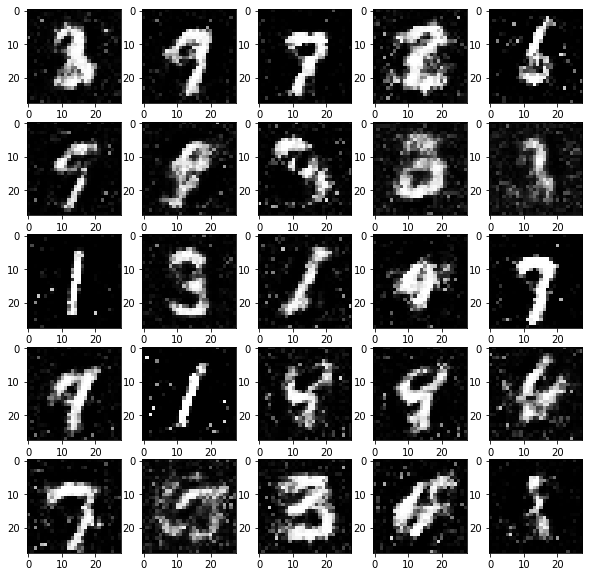

In [ ]:
imgs = 0.5 * (out_img + 1)

plt.figure(figsize = (10,10))

for k in range(25):
  plt.subplot(5,5,k+1)
  image = np.reshape(imgs[k], (28,28)) # 크기 변경
  plt.imshow(image, cmap='gray')

# ======================================================

# 하이퍼 파라미터 변경에 맞춘 코드 수정

In [7]:
# 폴더 만드는 함수
import os
 
path = '/content/drive/MyDrive/딥러닝과제/HW#3_1_img'

def makedirs(path): 
   try: 
        os.makedirs(path) 
   except OSError: 
       if not os.path.isdir(path): 
           raise

In [58]:
# 손실함수 그래프 구현
def loss_graph(D, G, path,  batch_size, n_epoch ):
  plt.plot(D , label = 'Discriminator')
  plt.plot(G, label = 'Generator')
  plt.title('D_Loss & G_Loss  --> Epoch : {} , Batch_size : {}'.format(n_epoch, batch_size))
  plt.legend()
  plt.show()
  plt.savefig( path + '/loss_batch_{}_nepoch_{}.png'.format(batch_size, n_epoch))

In [9]:
# 생성된 그림 구현
def make_digit(imgs, path , batch_size, n_epoch):
  # plt.figure(figsize = (7,7))
  for k in range(25):
    plt.subplot(5,5,k+1)
    image = np.reshape(imgs[k], (28,28)) # 크기 변경
    plt.imshow(image, cmap='gray')
  plt.suptitle('Epoch : {}  , Batch_size : {}'.format(n_epoch, batch_size))
  plt.savefig( path + '/generate_batch_{}_nepoch_{}.png'.format(batch_size, n_epoch))

batch_size : 64 , n_epoch : 5000 
on epoch0
on epoch1000
on epoch2000
on epoch3000
on epoch4000
저장된 loss 개수 : 5000
batch_size : 64 , n_epoch : 15000 
on epoch0
on epoch1000
on epoch2000
on epoch3000
on epoch4000
on epoch5000
on epoch6000
on epoch7000
on epoch8000
on epoch9000
on epoch10000
on epoch11000
on epoch12000
on epoch13000
on epoch14000
저장된 loss 개수 : 15000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


batch_size : 64 , n_epoch : 30000 
on epoch0
on epoch1000
on epoch2000
on epoch3000
on epoch4000
on epoch5000
on epoch6000
on epoch7000
on epoch8000
on epoch9000
on epoch10000
on epoch11000
on epoch12000
on epoch13000
on epoch14000
on epoch15000
on epoch16000
on epoch17000
on epoch18000
on epoch19000
on epoch20000
on epoch21000
on epoch22000
on epoch23000
on epoch24000
on epoch25000
on epoch26000
on epoch27000
on epoch28000
on epoch29000
저장된 loss 개수 : 30000
batch_size : 128 , n_epoch : 5000 
on epoch0
on epoch1000
on epoch2000
on epoch3000
on epoch4000
저장된 loss 개수 : 5000
batch_size : 128 , n_epoch : 15000 
on epoch0
on epoch1000
on epoch2000
on epoch3000
on epoch4000
on epoch5000
on epoch6000
on epoch7000
on epoch8000
on epoch9000
on epoch10000
on epoch11000
on epoch12000
on epoch13000
on epoch14000
저장된 loss 개수 : 15000
batch_size : 128 , n_epoch : 30000 
on epoch0
on epoch1000
on epoch2000
on epoch3000
on epoch4000
on epoch5000
on epoch6000
on epoch7000
on epoch8000
on epoch9000
on epo

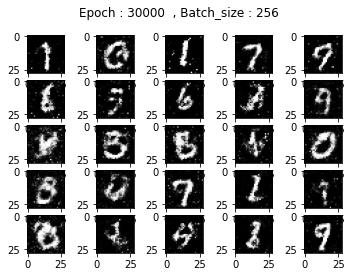

In [36]:
# 모델 학습 --> batch_size와 epoch 횟수를 변경시키면서 결과 파악
from itertools import product
batch_size = [64,128,256]
n_epoch = [5000, 15000, 30000]

combi = list(product(batch_size, n_epoch)) # batch_size와 n_epoch의 조합결과를 combi에 저장
all_loss = [] # 모든 조합의 손실값 저장



for batch_size, n_epoch in combi:

  # 그래프들을 저장할 폴더 만들기
  makedirs(path) 
    
  # placeholder는 다른 텐서를 할당하는 것
  x = tf.placeholder(tf.float32, [batch_size, 28*28], name = 'x_data')
  z_noise = tf.placeholder(tf.float32, name = 'z_prior')

  # dropot의 keep_prob 확률 
  keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')

  # 생성자 함수를 이용해 생성자 출력 및 가중치 정의
  out_gen, weight_g = generator(z_noise)

  # 판별자 함수를 이용해 판별자 출력 및 가중치 정의
  y_data, y_fake, weight_d = discriminator(x, out_gen, keep_prob)

  # 판별자와 생성자를위한 손실함수 및 최적화
  disc_loss =  - (tf.log(y_data) + tf.log(1-y_fake)) # 판별자 손실함수
  gen_loss = - tf.log(y_fake)   # 생성자 손실함수
  optimizer = tf.train.AdamOptimizer(0.0001)  # 최적화 기법으로 adam사용
  d_trainer = optimizer.minimize(disc_loss, var_list = weight_d) # 판별자 학습
  g_trainer = optimizer.minimize(gen_loss, var_list = weight_g) # 생성자 학습
  
  # 세션을 하나 설정하고, 실행시킨다.
  sess = tf.Session() # 세션 선언
  init = tf.global_variables_initializer() # 초기화 함수 저장
  sess.run(init) # 세션에서 초기화 실행

  z_sample = np.random.uniform(-1,1,size=(batch_size, n_noise)).astype(np.float32)

  print("============================================")
  print("batch_size : {} , n_epoch : {} ".format(batch_size, n_epoch))
  
  losses = []  # 각 조합의 손실값 저장
  
  with tf.device('/device:GPU:0'):
    for epoch in range(n_epoch):
      batch_x, _ = mnist.train.next_batch(batch_size) # 배치 사이즈 만큼 가져오기
      x_value = 2*batch_x.astype(np.float32) -1
      z_value = np.random.uniform(-1,1,size = (batch_size, n_noise)).astype(np.float32) # 잡음 생성
      sess.run(d_trainer, feed_dict = {x:x_value, z_noise : z_value, keep_prob : 0.7})
      sess.run(g_trainer, feed_dict = {x:x_value, z_noise : z_value, keep_prob : 0.7})
      
      # 손실값 계산
      [c1,c2] = sess.run([disc_loss ,gen_loss], feed_dict = {x:x_value,z_noise : z_value, keep_prob : 0.7})
      G_loss = np.sum(c1)/batch_size   # 생성자 loss 저장
      D_loss = np.sum(c2)/batch_size   # 판별자 loss 저장
      losses.append((G_loss, D_loss))

      
      if epoch % 1000 == 0 :
        print('on epoch{}'.format(epoch))

    all_loss.append(losses)
    print('저장된 loss 개수 :', len(losses))
              
    
    # 가짜 이미지 생성 및 한 묶음의 가짜 이미지 저장
    out_img = sess.run(out_gen, feed_dict = {z_noise : z_sample})
    imgs = 0.5 * (out_img + 1)
    make_digit(imgs, path , batch_size, n_epoch)

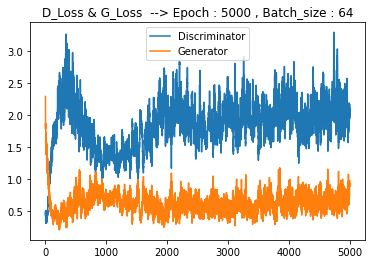

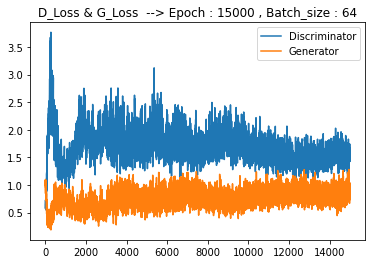

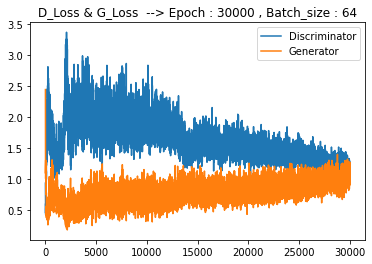

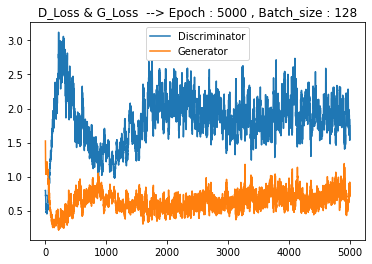

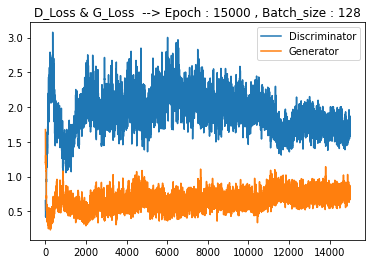

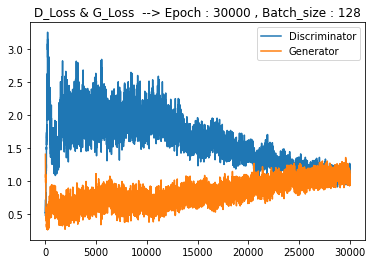

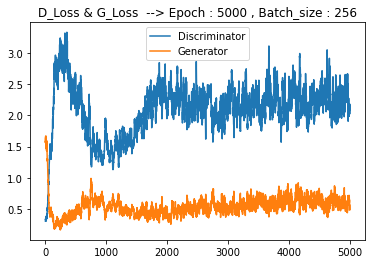

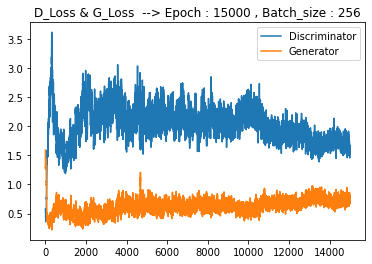

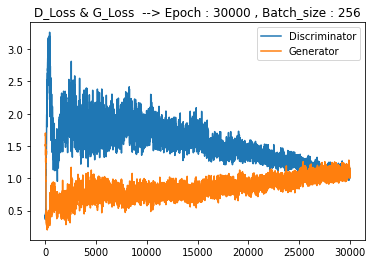

<Figure size 432x288 with 0 Axes>

In [59]:
# 각각의 해당 파라미터마다 구한 손실값을 이용해 그래프 생성
for i, (batch_size, n_epoch) in enumerate(combi):
  G = [all_loss[i][j][0] for j in range(len(all_loss[i]))]  # G_loss의 값만 저장
  D = [all_loss[i][j][1] for j in range(len(all_loss[i]))]  # D_loss의 값만 저장

  loss_graph(D, G,path, batch_size, n_epoch) # 그래프 생성 및 그래프 저장

###########################
# epoch가 커지고 batch_size가 커질수록 생성자와 구별자의 학습이 잘 되고 있음을 확인할 수 있다.

In [67]:
# 저장 이미지 파일 확인
! ls -l /content/drive/MyDrive/딥러닝과제/HW#3_1_img

total 709
-rw------- 1 root root 75395 Nov 20 07:10 generate_batch_128_nepoch_15000.png
-rw------- 1 root root 64733 Nov 20 07:15 generate_batch_128_nepoch_30000.png
-rw------- 1 root root 89044 Nov 20 07:08 generate_batch_128_nepoch_5000.png
-rw------- 1 root root 78371 Nov 20 07:18 generate_batch_256_nepoch_15000.png
-rw------- 1 root root 64857 Nov 20 07:23 generate_batch_256_nepoch_30000.png
-rw------- 1 root root 88962 Nov 20 07:16 generate_batch_256_nepoch_5000.png
-rw------- 1 root root 84094 Nov 20 07:04 generate_batch_64_nepoch_15000.png
-rw------- 1 root root 71282 Nov 20 07:08 generate_batch_64_nepoch_30000.png
-rw------- 1 root root 92554 Nov 20 07:02 generate_batch_64_nepoch_5000.png
-rw------- 1 root root  1273 Nov 20 07:36 loss_batch_128_nepoch_15000.png
-rw------- 1 root root  1273 Nov 20 07:36 loss_batch_128_nepoch_30000.png
-rw------- 1 root root  1273 Nov 20 07:36 loss_batch_128_nepoch_5000.png
-rw------- 1 root root  1273 Nov 20 07:36 loss_batch_256_nepoch_15000.png

In [87]:
# 위에서 학습한 모델들을 가지고 생성한 숫자 이미지 가져오기
from PIL import Image as Im
import glob
import os

files = glob.glob('/content/drive/MyDrive/딥러닝과제/HW#3_1_img/generate*.png') # 가져올 파일들 저장

img = []
for file in files :
  image =Im.open(file)
  img.append(image)

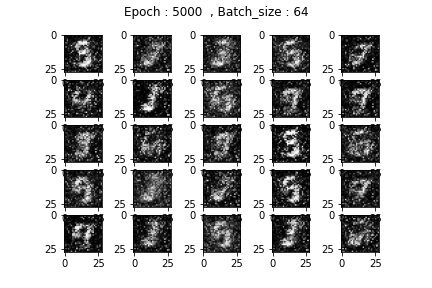

In [89]:
img[0]

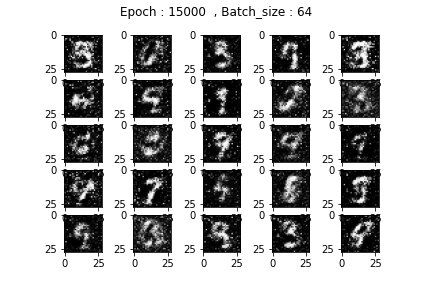

In [90]:
img[1]

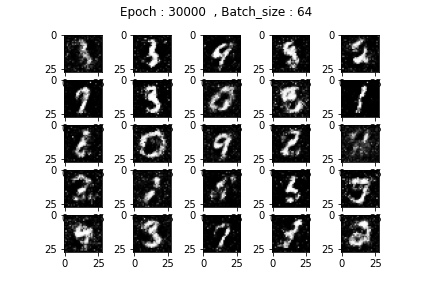

In [91]:
img[2]

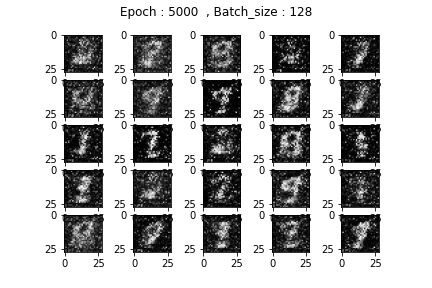

In [92]:
img[3]

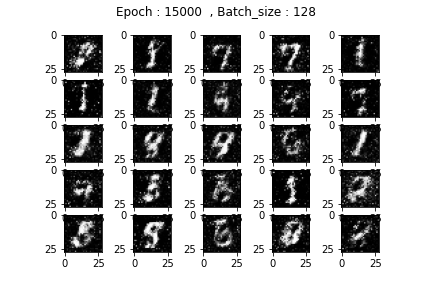

In [93]:
img[4]

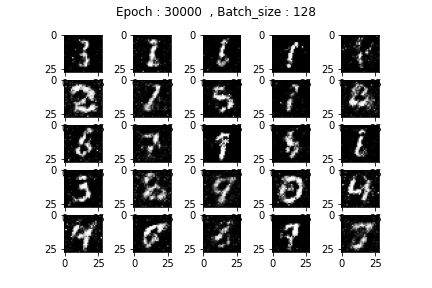

In [94]:
img[5]

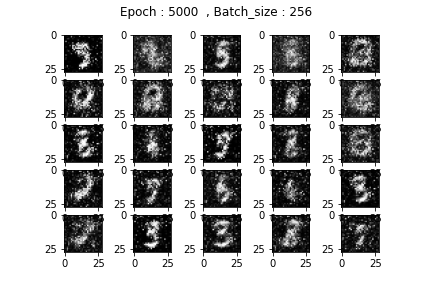

In [95]:
img[6]

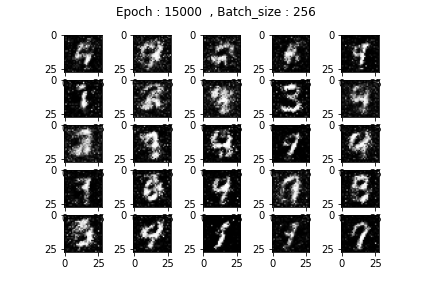

In [96]:
img[7]

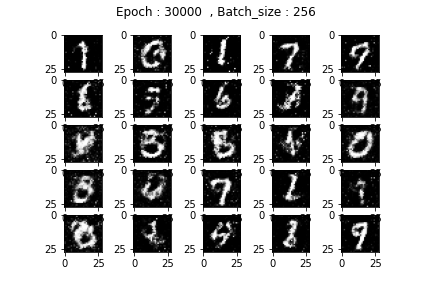

In [97]:
img[8]